## **Problem Defination**

The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the
Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy.
The main goal is to predict which mushroom is poisonous & which is edible.

## **Data Ingestion**

- Dataset Source - https://www.kaggle.com/datasets/uciml/mushroom-classification
- Dataset Contain 23 columns and 8124 rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("data/mushrooms.csv")

In [2]:
data.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


# **EDA (Exploratory Data Analysis)**

### Dataset Information

https://grocycle.com/wp-content/uploads/2021/08/partd-diagram.jpg

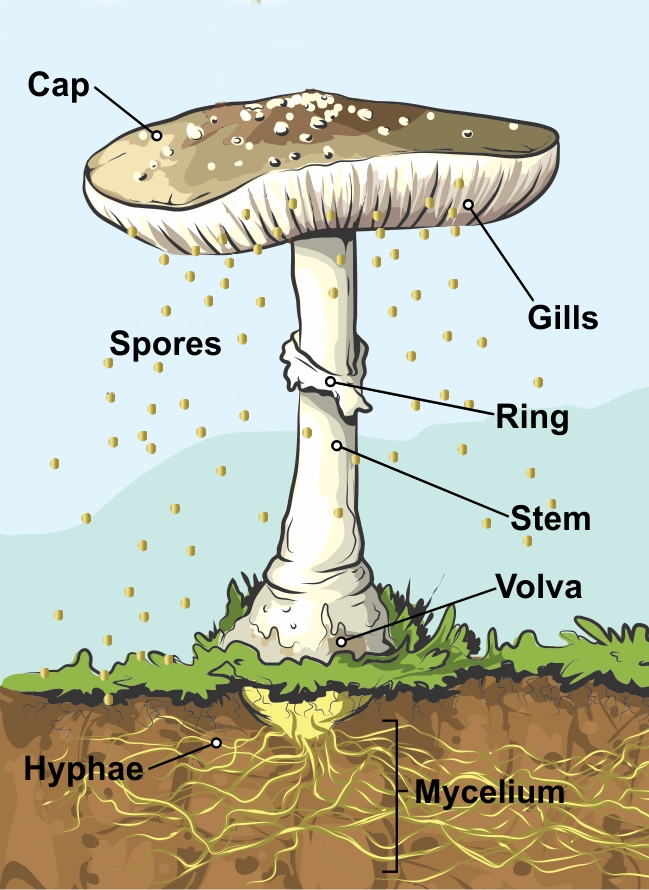

#### Attribute Information:

- (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### 3. Data Checks


- Data Overview (size,shape,datatypes)
- Missing values
- Duplicates Values
- Balance/Imbalance Dataset
- Number of unique values for each columns
- statistics of data set
- various categories in categorical columns

#### 1. Data Overview

In [3]:
print("shape of data",data.shape )

shape of data (8124, 23)


In [4]:
data.memory_usage()

Index                         132
class                       64992
cap-shape                   64992
cap-surface                 64992
cap-color                   64992
bruises                     64992
odor                        64992
gill-attachment             64992
gill-spacing                64992
gill-size                   64992
gill-color                  64992
stalk-shape                 64992
stalk-root                  64992
stalk-surface-above-ring    64992
stalk-surface-below-ring    64992
stalk-color-above-ring      64992
stalk-color-below-ring      64992
veil-type                   64992
veil-color                  64992
ring-number                 64992
ring-type                   64992
spore-print-color           64992
population                  64992
habitat                     64992
dtype: int64

In [5]:
data.sample(5).T

,5483,6183,512,6605,4058
class,p,p,e,p,p
cap-shape,x,x,x,k,x
cap-surface,y,y,f,y,s
cap-color,n,e,w,n,p
bruises,f,f,t,f,f
odor,y,s,a,f,c
gill-attachment,f,f,f,f,f
gill-spacing,c,c,w,c,w
gill-size,n,n,n,n,n
gill-color,b,b,n,b,u


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 2. Missing Values

In [7]:
data.isnull().sum().sum()

0

#### 3. Duplicated Values

In [8]:
data.duplicated().sum()

0

#### 4. Unique Values

In [9]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

#### 5.Statistics 

In [10]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


#### 6. Categorical features : Categories

In [11]:
print(data["veil-type"].value_counts())

veil-type
p    8124
Name: count, dtype: int64


### <font color='red'>**Insight :**</font>
- The dataset contain 23 columns(features) and 8124 rows(observation)
- Where Each feature is Categorical feature gives information about parts of mashroom (size,shape,colour,etc)
- The dataset has Categorical dependent feature with categories: Edible 'e' and poisonous 'p'.
- The dataset dont have any Null/missing values and Duplicate values
- veil-type feture has 1 category so we can remove it

In [2]:
# only one category we remove it.
data.drop(columns="veil-type",inplace=True)

### Univariated Analysis

In [13]:
def count_plot(col):
    plt.title(col.name)
    sns.countplot(x=col,hue=col)
    plt.grid()

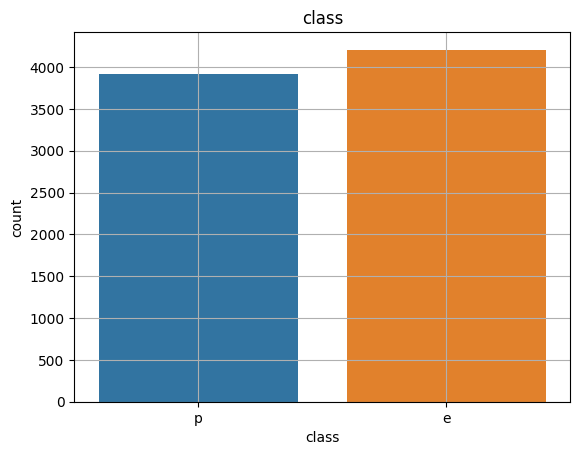

In [14]:
count_plot(data["class"])

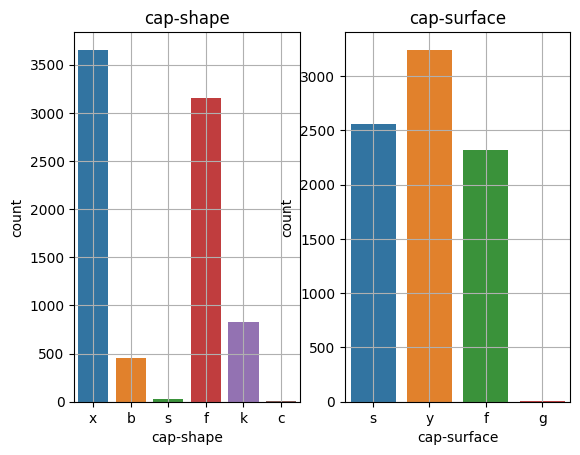

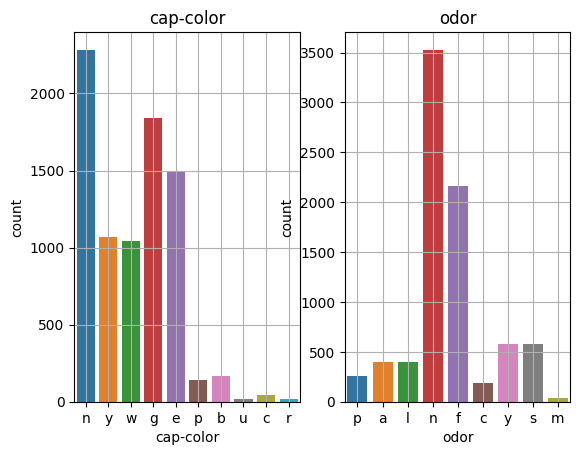

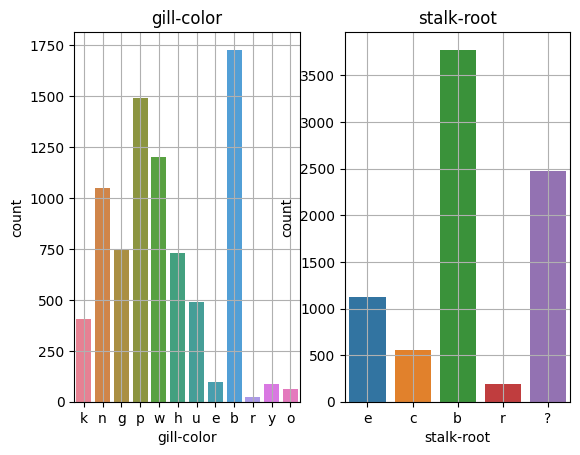

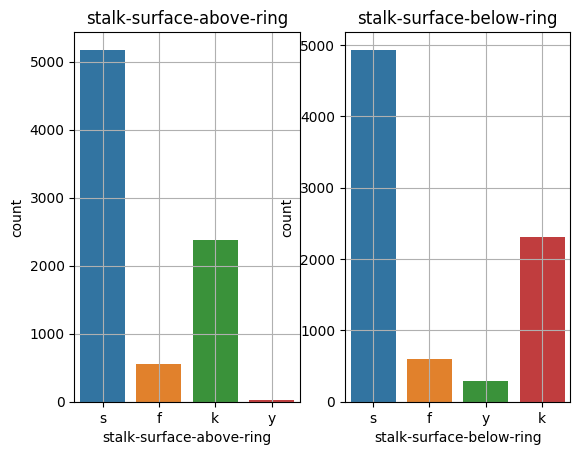

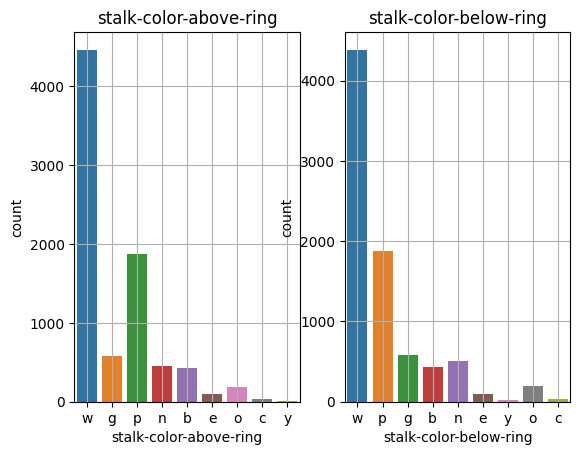

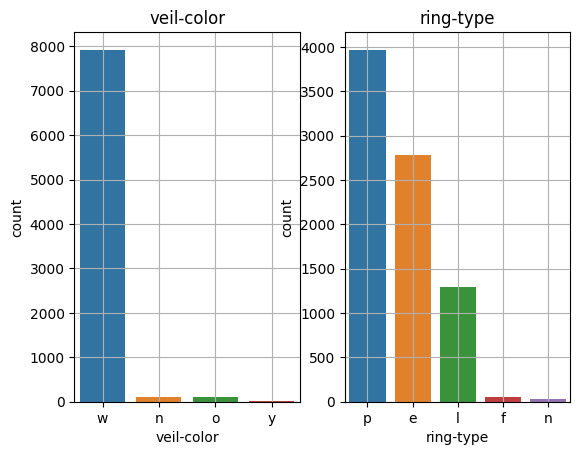

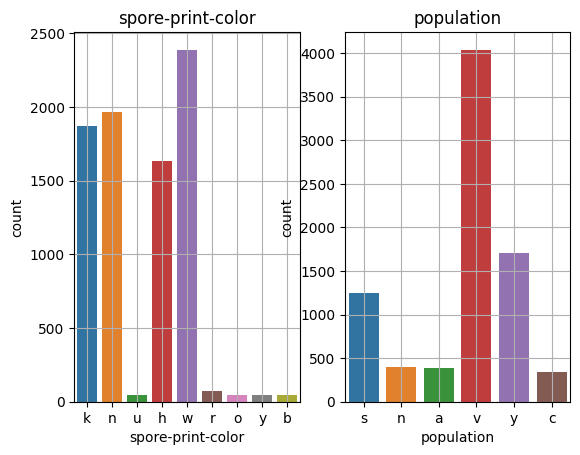

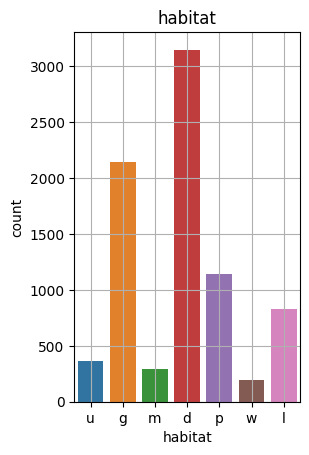

In [27]:
lst=['cap-shape', 'cap-surface', 'cap-color', 'odor','gill-color','stalk-root',
      'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring',
      'stalk-color-below-ring', 'veil-color','ring-type','spore-print-color', 'population', 'habitat']
j=0
for i in lst:
    if j==2 :
        j=0
        plt.show()
    j=j+1
    plt.subplot(1,2,j)
    count_plot(data[i])

### <font color='red'>**Insight :**</font>

- We can observe that the target variable (dependent variable) is a categorical variable with two classes: "edible" denoted by "e" and "poison" denoted by "p".
- The data is balanced, as both categories of the target variable contain a similar count, which is beneficial.
- Among the features (gill-attachment, gill-spacing, veil-color, ring-number),they have one majority category , count of other categories is very less, which is not good.
- About Features : 
    - cap-shape : convex(x),flat (f) categories have maximum value count where other categories very low count
    - cap-surface : grooves (g) category have very low value count compairing other categories
    - odor : none (n) and foul (f) has highest value count in odor
    - gill-color : buff(b),pink (p), white (w) have top 3 value counts
    - stalk-root : missing (?) , bulbous (b) are having highest value counts
    - stalk surface above and below ring both have smooth (s) and silky (k) with higest count 
    - stalk color above and below ring both features have white (w) with higest count
    - veil color is also mainly white (w) other categories value count is very low
    - population : the highest is several (v) in value count
    - habitat : They mostly occured in  woods (d) , grass (g)

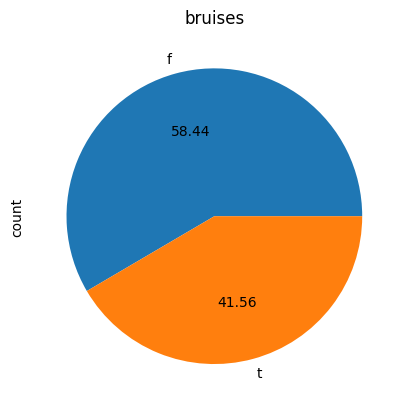

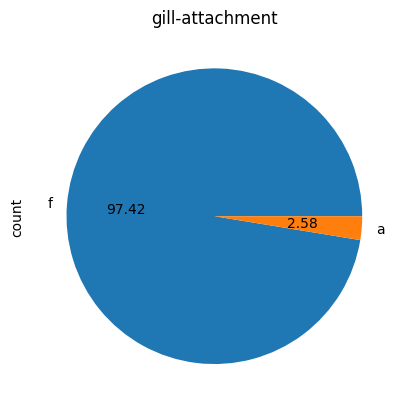

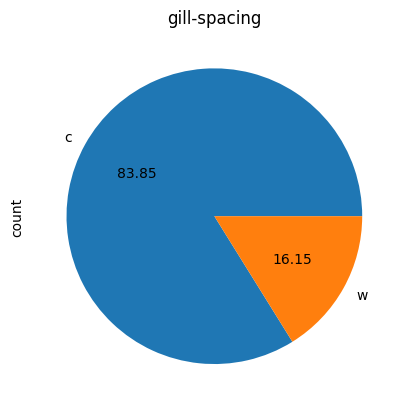

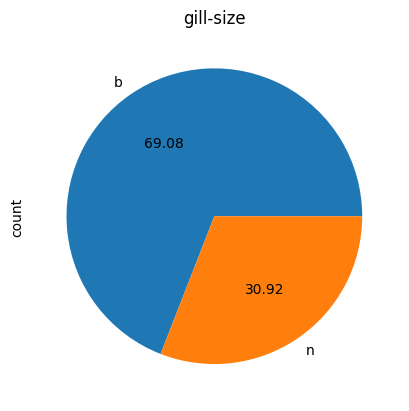

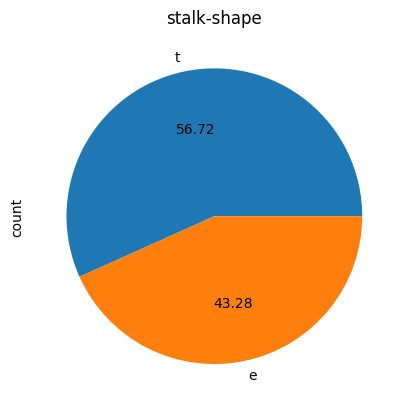

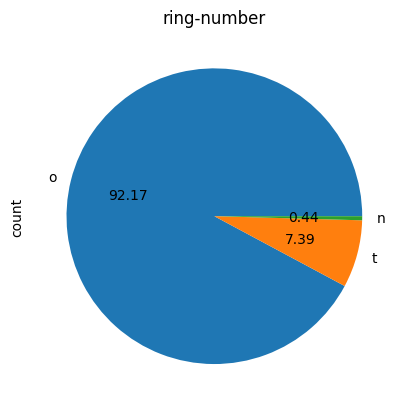

In [28]:
for i in ["bruises","gill-attachment",'gill-spacing', 'gill-size','stalk-shape','ring-number']:
    plt.title(i)
    data[i].value_counts().plot(kind="pie",autopct="%.2f")
    plt.show()

### <font color='red'>**Insight :**</font>

- 58.44 % of observations have bruises where 41.56 % dont have buises
- gill-attachment : almost all observation are free (f) very few are attached (a)
- gill-spacing : 83% are close where 16% are crowded (w)
- Ring number : 92.17 % of observation contain one ring 

### Bivariated Analysis

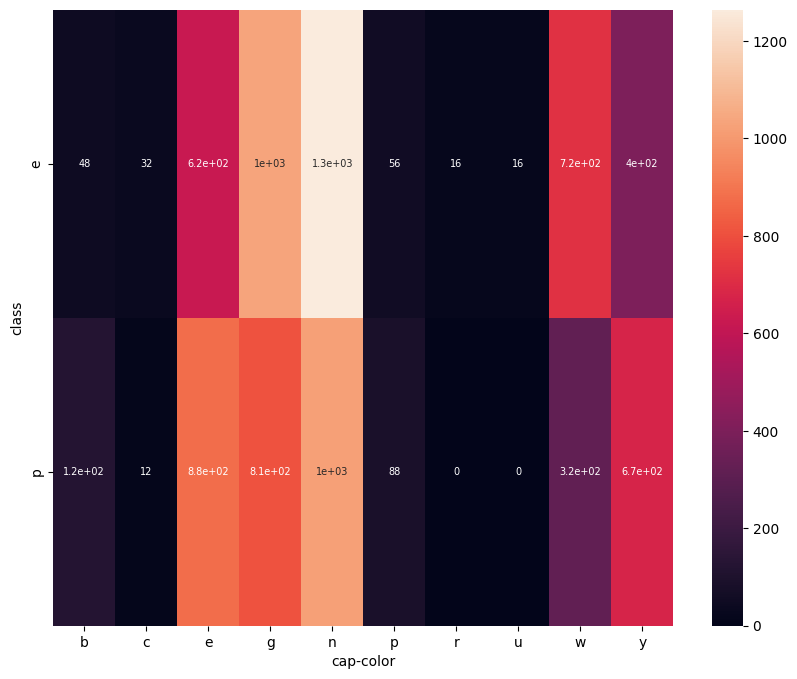

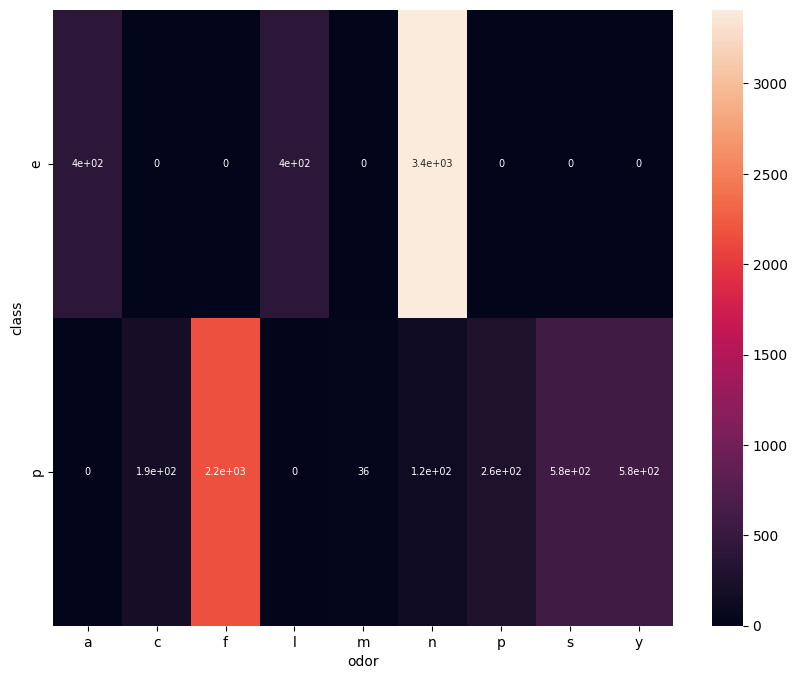

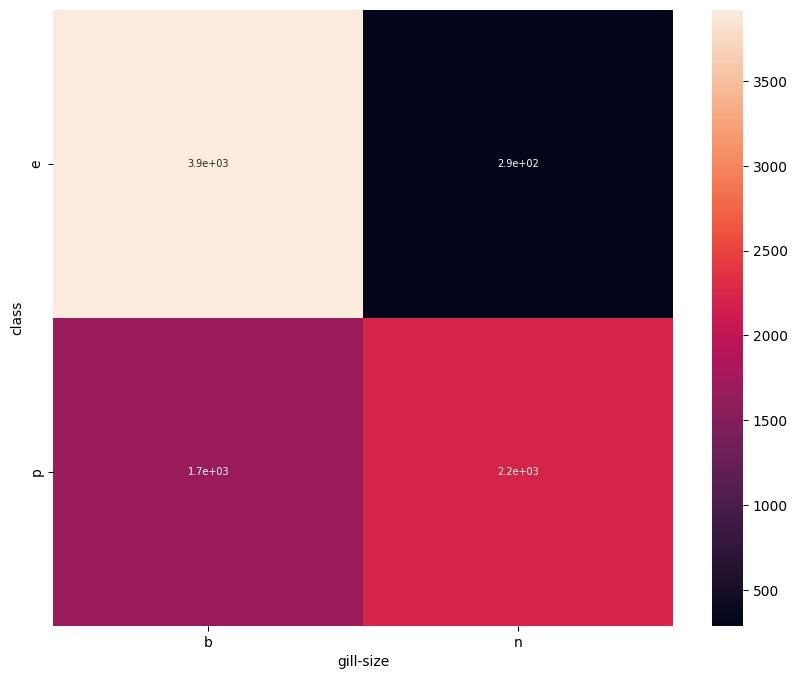

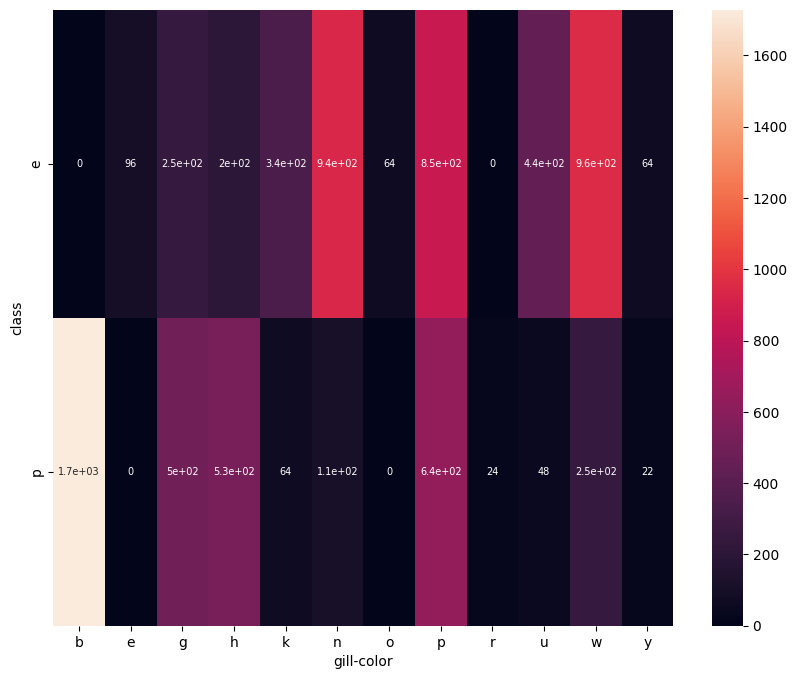

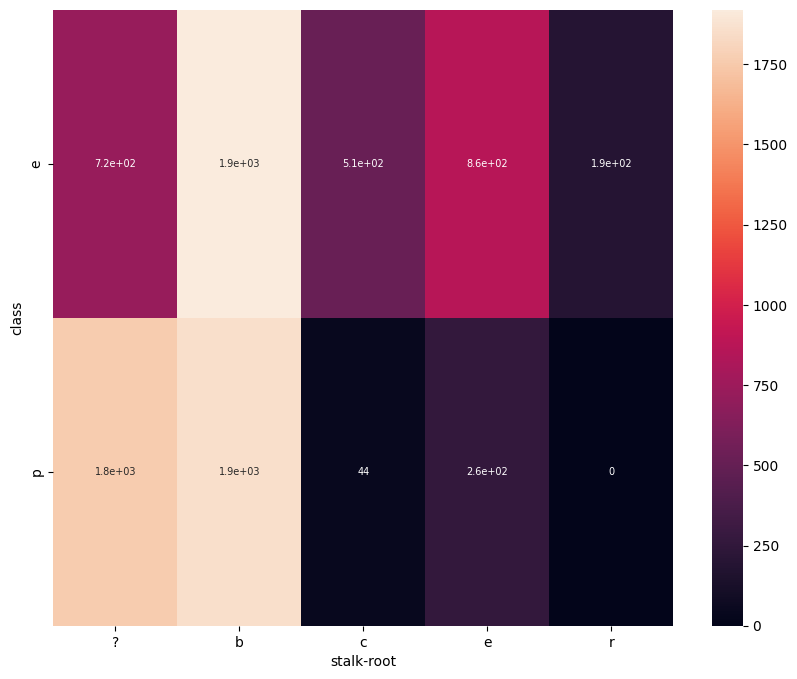

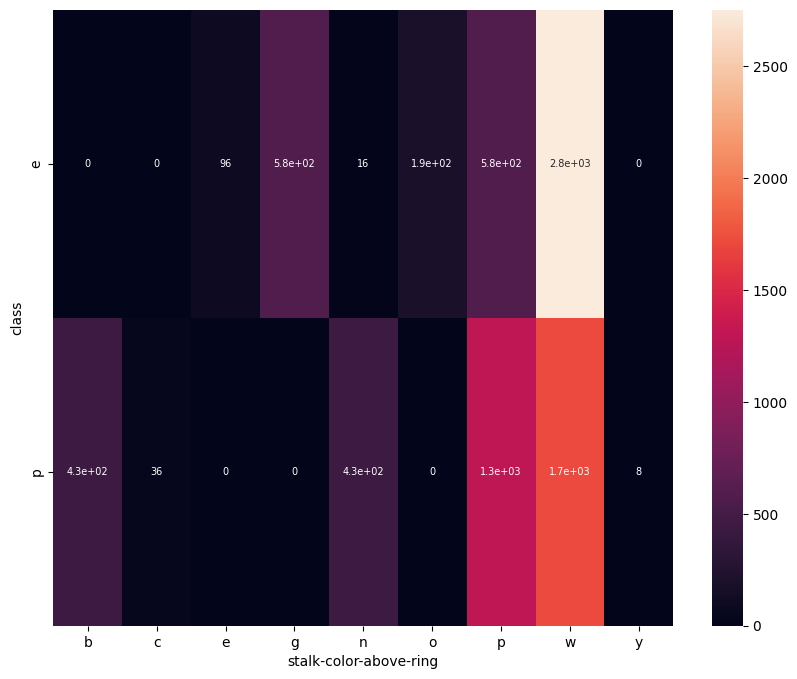

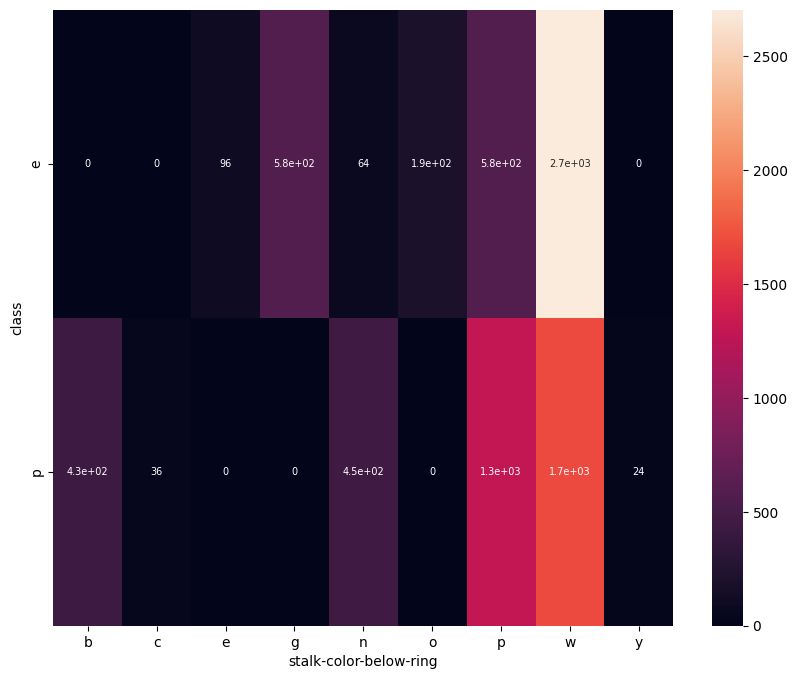

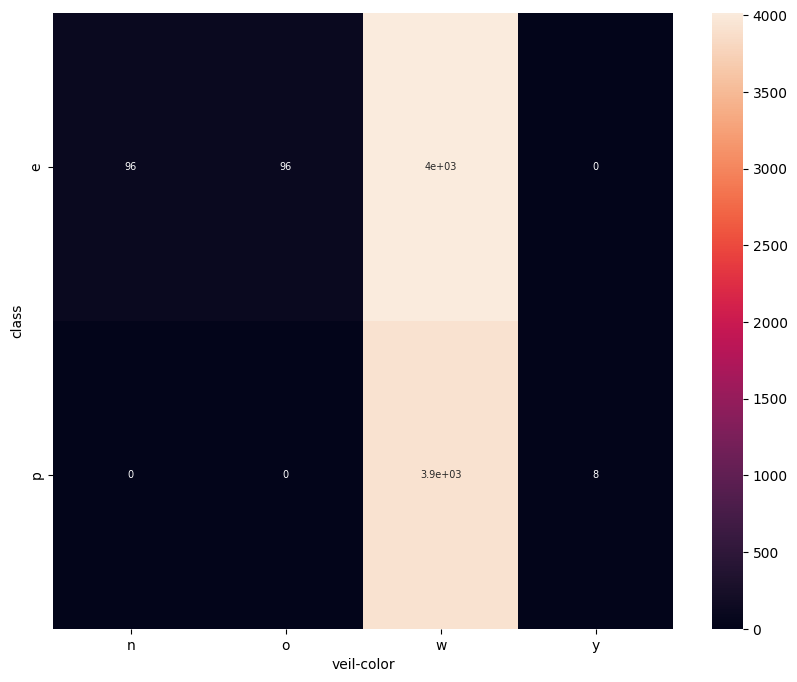

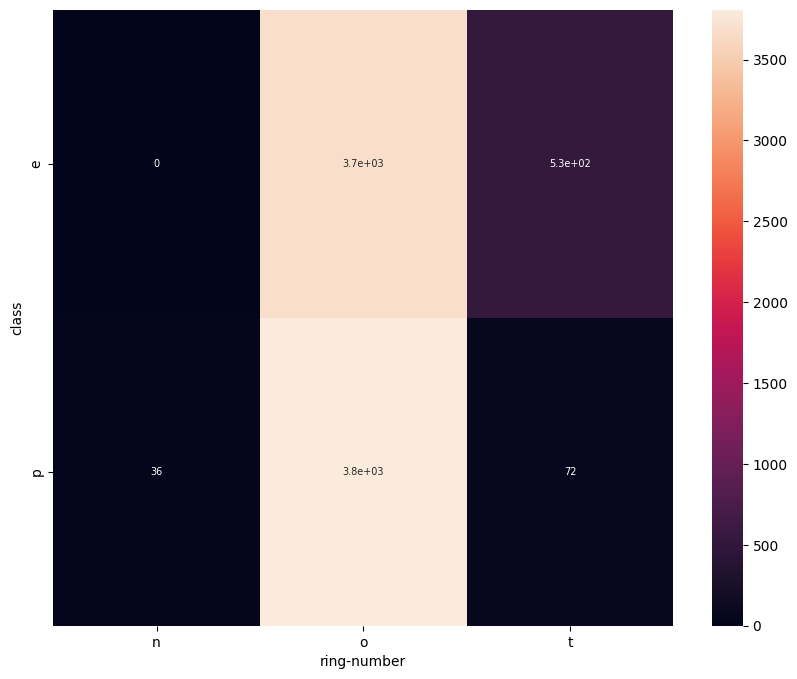

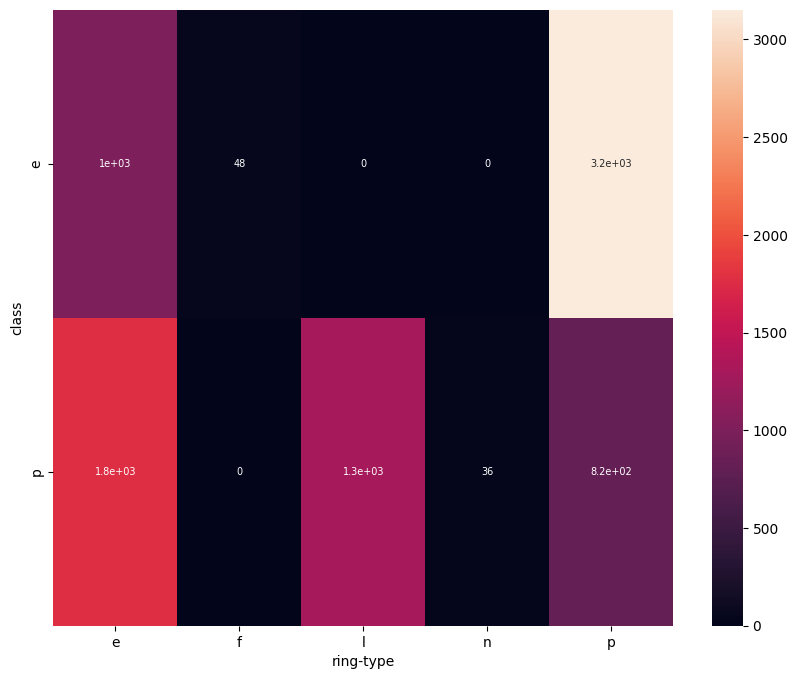

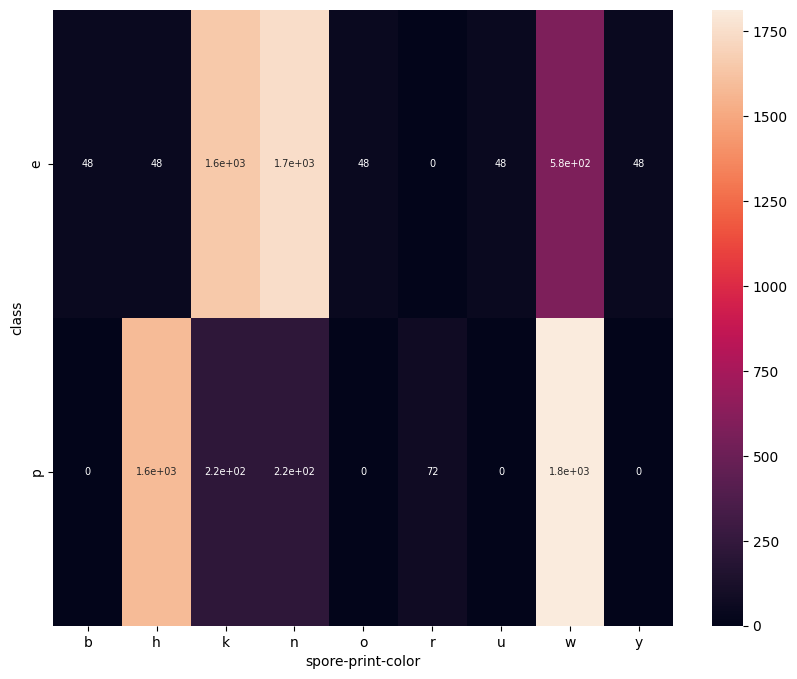

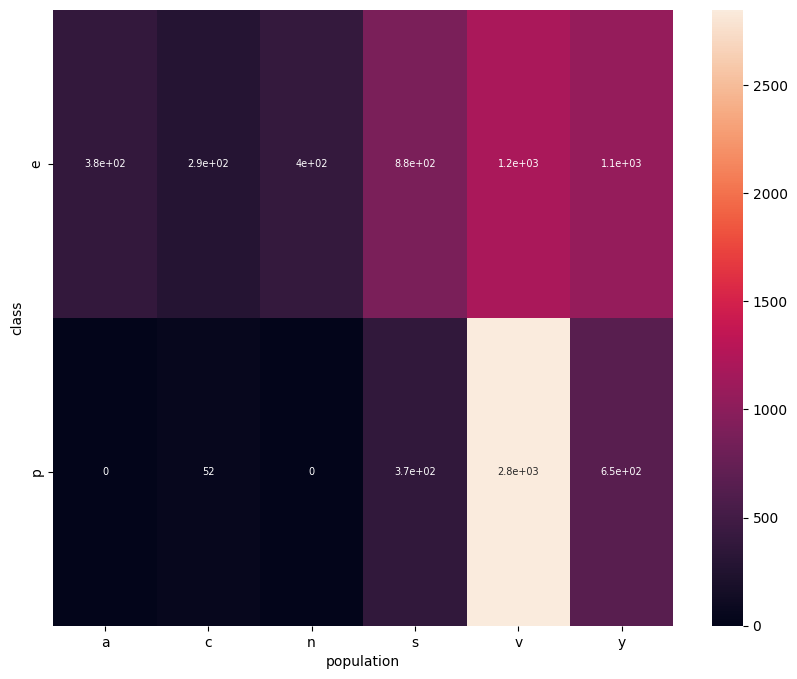

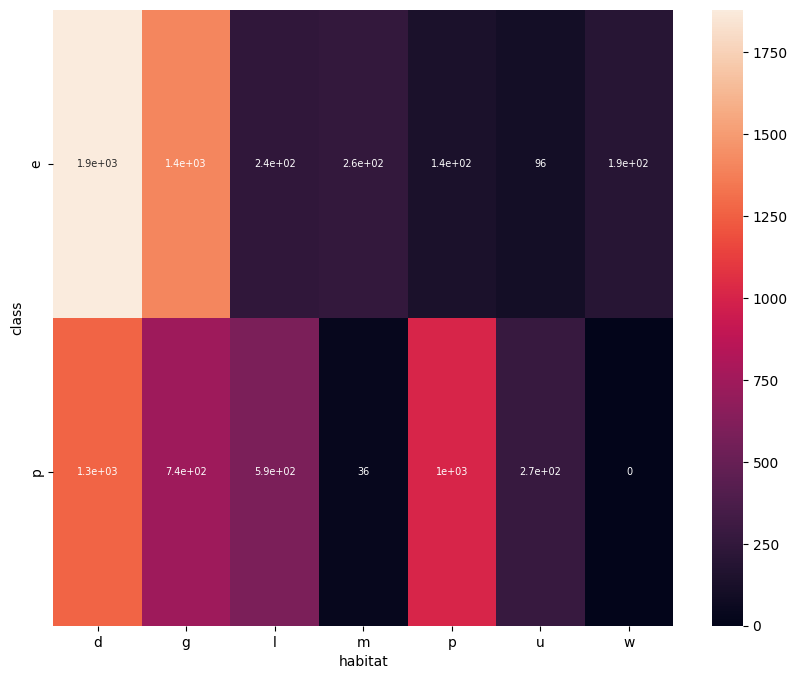

In [11]:
for i in ["cap-color","odor","gill-color","stalk-root", 'stalk-color-above-ring',
          'stalk-color-below-ring',"veil-color",'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']:
    plt.figure(figsize=(10,8))
    sns.heatmap(pd.crosstab(data["class"],data[i]),annot=True,annot_kws={"fontsize":7})
    plt.show()

### <font color='red'>**Insight :**</font>

- Mushrooms having cap color green,pink are edible not for buff
- Mushrooms having odors creosote,foul,musty,pungent,spicy,fishy are poisons where anise  are edible
-  Mushrooms with gill color  buff,green are poisonous where as red,orange are edible
-  mushrooms with stalk roots : rooted are edible
-  mushrooms with stalk color above ring buff,cinnamon,yellow are poisonous where orange are edible
-  mushrooms with stalk color below ring buff,cinnamon,yellow are poisonous where red,orange are edible
-  mushrooms having veil-color brown,orange are edible and yellow are poisonous
-  mushrooms without ring  are poisonous
-  mushrooms with ring type large,none are poisonous where  flaring are edible
-  mushrooms with spore print buff,purple,yellow are edible where green are poisonous
-  mushrooms with population abundant,numerous are edible
-  mushrooms with habitat waste are edible
